# Assignment 2: PCA

## What you will learn

* Working with images using scikit-image
* PCA using scikit-learn
* Practical applications of PCA

## Setup

* Download [Anaconda Python 3.6](https://www.anaconda.com/download/) for consistent environment.
* If you use pip environment then make sure your code is compatible with versions of libraries provided withing Anaconda's Python 3.6 distribution.

## Submission
* Do not change any variable/function names.
* Just add your own code and don't change existing code
* Save this file and rename it to be **studentid_lastname.ipynb** (student id (underscore) last name.ipynb) where your student id is all numbers.
* Submit only single .ipynb file to learn (no zip or .py files or anything else)
* If you happen to use any external library not included in Anaconda (mention in **Submission Notes** section below)

## Submission Notes
(Please write any notes here that you think I should know during marking)

# [NO MARKS] PCA Warming Up (MUST READ)

I'm adding some code to illustrate examples of PCA using sklearn library.

**Let's create some random `5d` data**

In [1]:
import numpy as np
from sklearn.decomposition import PCA

# 100 points of 5d data
data = np.random.rand(100, 5)

**Lets convert this `5d` data to `2d` using PCA`**

In [2]:
# n_components=2 because I want to convert 5d data to 2d (dimensionality reduction)
pca = PCA(n_components=2)
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In code above when we call `fit`, it populates two things in `pca`:
1. `mean_`
2. `components_`

In [3]:
# mean of the input data (per dimension) used to zeroying the mean
pca.mean_

array([ 0.54865895,  0.44192138,  0.52014384,  0.5284355 ,  0.49940989])

In [4]:
# basis vectors
pca.components_

array([[ 0.00800708,  0.82334342, -0.3296878 , -0.39706388,  0.23598248],
       [-0.67115364,  0.01046705, -0.5195329 ,  0.51375044,  0.1248571 ]])

Now we are ready to transform `5d` from `data` into `2d` using following code

In [8]:
data_to_reduce = data[:10]
reduced_data = np.dot(data_to_reduce - pca.mean_, pca.components_.T)

# reduced data from 5d to 2d
reduced_data.shape

(10, 2)

You can accomplish the same using `transform` function provided in `pca`

In [9]:
pca.transform(data_to_reduce).shape

(10, 2)

Time for inverse transform or changing `2d` data back to `5d`

Compression --> Decompression

In [10]:
decompressed_data = np.dot(reduced_data, pca.components_)+pca.mean_
decompressed_data

array([[  6.30064957e-01,   2.58939026e-01,   6.57278522e-01,
          5.52387962e-01,   4.31863254e-01],
       [  2.41042460e-01,   1.99569654e-01,   3.82831322e-01,
          8.81239830e-01,   4.85363917e-01],
       [  1.74947428e-01,   5.91404810e-01,   1.72261950e-01,
          7.46302737e-01,   6.10360104e-01],
       [  9.69252428e-01,   1.08920248e-01,   9.78873692e-01,
          3.61457738e-01,   3.27026023e-01],
       [  4.74381987e-01,  -8.78706800e-04,   6.43733871e-01,
          7.96058129e-01,   3.85199008e-01],
       [  5.66462501e-01,   1.09911536e-01,   6.69236229e-01,
          6.72294426e-01,   4.00432798e-01],
       [  7.59933976e-01,   6.83679816e-02,   8.34714983e-01,
          5.42487120e-01,   3.53330400e-01],
       [  9.47533554e-01,   2.43026333e-01,   9.07498725e-01,
          3.14578027e-01,   3.69642340e-01],
       [  5.45093928e-01,   3.04522320e-01,   5.73450826e-01,
          5.96419876e-01,   4.60433888e-01],
       [  5.79856630e-01,   6.3581971

In [11]:
# same can we accomplished using inverse_transform
pca.inverse_transform(pca.transform(data_to_reduce))

array([[  6.30064957e-01,   2.58939026e-01,   6.57278522e-01,
          5.52387962e-01,   4.31863254e-01],
       [  2.41042460e-01,   1.99569654e-01,   3.82831322e-01,
          8.81239830e-01,   4.85363917e-01],
       [  1.74947428e-01,   5.91404810e-01,   1.72261950e-01,
          7.46302737e-01,   6.10360104e-01],
       [  9.69252428e-01,   1.08920248e-01,   9.78873692e-01,
          3.61457738e-01,   3.27026023e-01],
       [  4.74381987e-01,  -8.78706800e-04,   6.43733871e-01,
          7.96058129e-01,   3.85199008e-01],
       [  5.66462501e-01,   1.09911536e-01,   6.69236229e-01,
          6.72294426e-01,   4.00432798e-01],
       [  7.59933976e-01,   6.83679816e-02,   8.34714983e-01,
          5.42487120e-01,   3.53330400e-01],
       [  9.47533554e-01,   2.43026333e-01,   9.07498725e-01,
          3.14578027e-01,   3.69642340e-01],
       [  5.45093928e-01,   3.04522320e-01,   5.73450826e-01,
          5.96419876e-01,   4.60433888e-01],
       [  5.79856630e-01,   6.3581971

In [12]:
# Lets find compression decompression error (absolute mean error)
np.sum(np.abs(data_to_reduce - decompressed_data))/data_to_reduce.size

0.1315154839213766

## Tasks [100 marks]

### Task 1: Building an Image Compression Algorithm

In this section you will build you own compression algorithm for images using PCA.

**STEP 1: Read the image**
1. Use `imread` function from `skimage.io` to read `leena.jpg`.
2. Show the image using `show_image` function provided to you

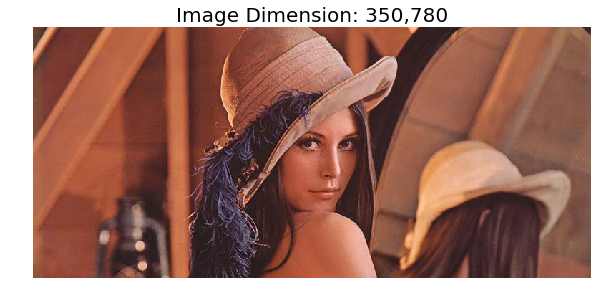

In [15]:
import matplotlib.pyplot as plt
# make matplotlib to show plots inline
%matplotlib inline

from skimage.io import imread

def show_image(img):
    if len(img.shape) == 2:
        plt.imshow(img, cmap='Greys_r')
    else:
        plt.imshow(img)
    plt.axis('off')
    plt.title('Image Dimension: {0},{1}'.format(img.shape[0], img.shape[1]), fontsize=20)
    
# !!ADD CODE HERE!!
image = imread('leena.jpg')
plt.figure(figsize=(10, 10))
show_image(image)

**STEP 2: Compressing an image using PCA**

Image is generally made of 3 (or 4) channels (RGB), we will build a compression algorithm that applies one channel at a time to compress multi-channel image.

In order to compress entire image you will compress all the channels within the image one by one and then serialize compressed channels and any auxiliary data required for decompression (for ex. principle components (components\_), means (means\_), original image size).

In order to decompress, you will deserialize the data, then uncompress the compressed channel one by one and stack them up to rebuild the uncompressed version of the original image. 


**Compression Strategy using PCA**

- The above image you have read is of size `350 x 780`, i.e. width is `780` and height is `350`
- Patch the image into `10x10` patches yielding `35x78=2730` patches in total.
- Flatten each patch `(10x10)` into `100` dimensional vector.
- Now (for each channel) you will have `2730` number of `100-d` vectors.
- Apply PCA on these vectors.
- Reduce the dimensionality of `100-d` vector to `5-d`.

I've given you two functions `patchify` and `depatchify`. 

`patchify` creates `100-d` vectors from all the patches from a given image and `depatchify` combines these `100-d` patches back to the image of the given size.

Please read through code below and figure out how these two functions work.

**NOTE**: `convert_to_cf` is important function to note (in cell below). It converts channel last format image to channel first format. Images that you read through `imread` function returns array of shape `X x Y x 3` channel is last axis, it is easier if channel were first axis then to extract any channel you can do use first indexer.

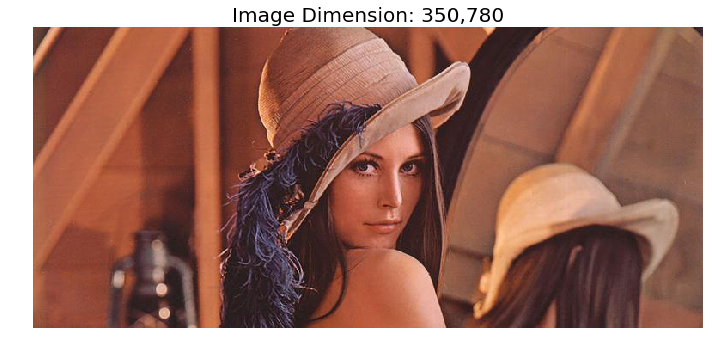

In [16]:
from sklearn.decomposition import PCA
import numpy as np


def patchify(img, ps=(10, 10)):
    patches = []
    h, w = img.shape
    for i in range(0, h, ps[0]):
        for j in range(0, w, ps[1]):
            patches.append(img[i:i+ps[0], j:j+ps[1]].ravel()) 
    return np.array(patches)


def depatchify(patches, patch_size=(10, 10), img_size=(350, 780)):
    # normalize
    patches[patches > 255.] = 255.
    patches[patches < 0.] = 0.
    
    # convert to unint8
    patches = patches.astype('uint8')
    rec_img = np.zeros(img_size, dtype='uint8')
    ph, pw = patch_size
    
    h, w = img_size
    x = 0
    for i in range(0, h, ph):
        for j in range(0, w, pw):
            rec_img[i:i+ph, j:j+pw] = patches[x].reshape((ph, pw))
            x += 1
            
    return rec_img

def convert_to_cf(img_cl):
    # convert image to channel first
    img_cf = np.swapaxes(img_cl.T, 1, 2)
    return img_cf

image=imread('leena.jpg')
img_cf = convert_to_cf(image)

# I'll patchify each channel and depatchify them
# Then I'll stack them together to create original image back
ch1 = depatchify(patchify(img_cf[0])) # first channel
ch2 = depatchify(patchify(img_cf[1])) # second channel
ch3 = depatchify(patchify(img_cf[2])) # third channel

# combine them now
rec_img = np.dstack((ch1, ch2, ch3))
plt.figure(figsize=(12, 12))
show_image(rec_img)

**STEP 3: Compressing single channel of an image (FILL TWO FUNCTIONS BELOW)**

Now you are familiar with how `patchify` and `depatchify` work. Do the following:

1. Write a function `compress` that will take one of the channel of the image as input and outputs compressed channel and auxiliary data required for decompressing. Return type of this function should be dictionary.
2. Write another function `decompress` that will take whatever dictionary data you returned from previous `compress` function and decompresses it into image channel (that was compressed).
3. PCA compression is lossy compression algorithm -- means you will loose the information during decompression.
4. I should be able to call two of your functions like so `decompress(compress(img_ch[0]))` to compress and decompress the given image's channel.

**Compress: Pseudo code**
- `Patchify` the given image's channel (input).
- Run `PCA` on the patches (you may use sklearn's implementation) to reduce them to `5d` vectors.
- You will need `basis vectors` or `principal components` and `mean` in order to reconstruct the data back to `100d`
- Return dictionary: `{'compressed_patches': 5d vectors, 'aux_data': principal components/basis vectors/means/final size of image}`
- By converting `100d` to `5d`, you reduce size by `20` times.

**Decompress: Pseudo code**
- Input is dictionary as returned by your `compress` function.
- Use `5d` vectors and do inverse PCA (check tutorial 2) and convert them back to `100d` vectors.
- Use `depatchify` function to convert these reconstructed `100d` vectors into an image channel

**Tip**:  Good code is always modular and easy to read.

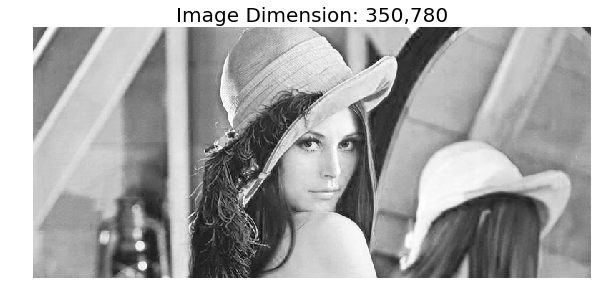

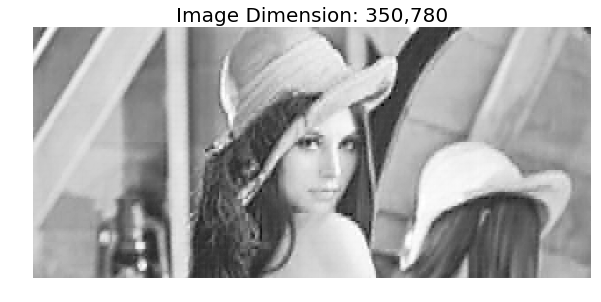

In [20]:
# COMPLETE FOLLOWING FUNCTIONS

def compress(img_ch, n_components=5):
    """
    Inputs
        img_ch: one of the channel of given image
        n_components: number of components returned by PCA
    Returns
        comp_data: Some data structure (may be dict.) that represents compressed form of given input
        along with auxiliary data required for decompression (components_, mean_ and shape of input image)
    """
    # patchify img_ch
    patches = patchify(img_ch)
    pca = PCA(n_components=n_components)
    pca.fit(patches)
    y = pca.transform(patches)
    
    # apply PCA with n=n_components on the patches
    # return dictionary {'y': compressed data, 'aux_data': auxiliary data for recontruction}
    return {'y': y, 'aux_data': (pca.components_, pca.mean_, img_ch.shape)}
    pass

def decompress(comp_data):
    """
    Inputs
        comp_data: data structure that is returned by `compress` function
    Returns
        img_ch: decompressed form of channel compressed and contained inside `comp_data` data structure
    """
    y = comp_data['y']
    components, means, img_size = comp_data['aux_data']
    
    # recontruct the patches to 100d using aux_data and inverse PCA
    # depatchify and return img_ch
    # rec_patches = inverse_transform(y, components, means)
    rec_patches = np.dot(y, components)+means
    img_ch = depatchify(rec_patches, img_size=img_size)
    return img_ch

# Red channel
# visualize your compression and decompression
img_ch = img_cf[0]
plt.figure(figsize=(10, 10))
show_image(img_ch)

plt.figure(figsize=(10, 10))
show_image(decompress(compress(img_ch, n_components=5)))

**STEP 3: Compress and decompress entire image (FILL TWO MORE FUNCTIONS)**

Write a `compress_image` function that:

- takes `channel last` (regular image read from `imread`) representation of an image
- convert `channel last` to `channel first` representation using `convert_to_cf` function defined previously
- compresses each of the channel using `compress` function
- outputs a one dictionary that contains all auxiliary data required to reconstruct/decompress entire image back.

Similarly, write `decompress_image` function that:

- decompresses the image compressed by `compress_image` function 
- return `channel last` image

**NOTE:** You would patchify each channel and implement PCA on each channel thus for decompression you need `components_`, `mean_` for each channel and you need shape of input image as well. 

(350, 780, 3)


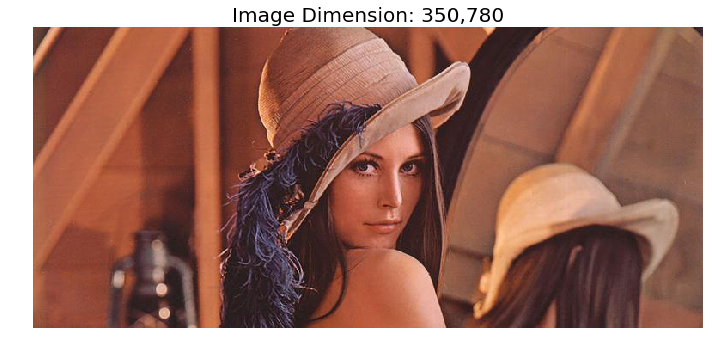

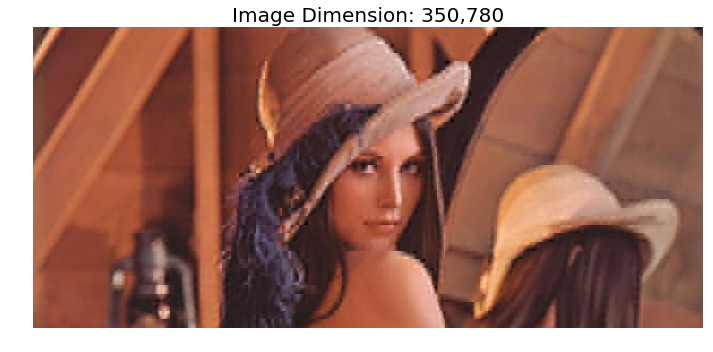

In [22]:
def compress_image(img):
    """
    Inputs:
        img_cf: `Channel last` image data
    """
    img_cf = convert_to_cf(img)
    
    ch1 = compress(img_cf[0])
    ch2 = compress(img_cf[1])
    ch3 = compress(img_cf[2])
    
    return {'ch1':ch1, 'ch2':ch2, 'ch3':ch3}
    pass

def decompress_image(comp_img):
    """
    Returns:
        img_rec: Decompressed `channel last` image
    """
    ch1 = decompress(comp_img['ch1'])
    ch2 = decompress(comp_img['ch2'])
    ch3 = decompress(comp_img['ch3'])
    rec_img = np.dstack((ch1, ch2, ch3))
    print(rec_img.shape)
    
    return rec_img
    pass


image=imread('leena.jpg')
plt.figure(figsize=(12, 12))
show_image(image)

plt.figure(figsize=(12, 12))
show_image(decompress_image(compress_image(image)))

**(BONUS) STEP 4: Serialization and de-serialization**

You can easily (de)serialize dictionary using `np.save` and `np.load` (see example below)

`compress_and_serialize` should:
- Read image given by `inp_path`
- Use `compress_image` to compress it
- Serialize the compressed data using `np.save` to a file specified by `out_path`

**NOTE:** All the data required for deserialization must be saved to a one single file only.

`deserialize_and_decompress` should:
- Read the file specified by `inp_path` using `np.load`
- Use `decompress_image` function to decompress it
- Return image (channel last as returned by `decompress_image`) function

In [780]:
# EXAMPLE OF SAVING AND LOADING DICTIONARY OBJECT TO/FROM FILESYSTEM
d = {'a': [1, 2, 3], 'b': [4, 5, 6, 7, 8]}
np.save('example.npy', d)
ds = np.load('example.npy').item()

ds

{'a': [1, 2, 3], 'b': [4, 5, 6, 7, 8]}

In [781]:
# COMPLETE THESE TWO FUNCTIONS
def compress_and_serialize(inp_path='leena.jpg', out_path='output.bin'):
    pass

def deserialize_and_decompress(inp_path='output.bin'):
    pass

**(BONUS) STEP 5: What is size of output.bin file?**

If you did **STEP 4** then proceed.

Did you end of in compressing anything? Conclude your experiments!

**Conclusion**

Write your conclusion here!!


In [ ]:
# RUN ONLY IF YOU DID STEP 4
import os

print('Original', os.path.getsize('leena.jpg'), 'bytes')
print('Compressed', os.path.getsize('output.bin'), 'bytes')

## Task 2: Rotation and Translation Invariance in PCA

**STEP 1 (done already): Create normally distributed data**

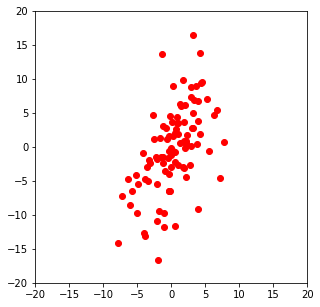

In [83]:
mean = [0, 0]
cov = [[10, 10], [10, 40]]  # diagonal covariance
x, y = np.random.multivariate_normal(mean, cov, 100).T
X = np.array(list(zip(x, y)))

def plot_data(X):
    plt.figure(figsize=(5, 5))
    plt.plot(X[:, 0], X[:, 1], 'ro')
    plt.xlim([-20, 20])
    plt.ylim([-20, 20])
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()
    
plot_data(X)

**STEP 2: Rotate the data by 45 degrees and create new array X_rot**

Write code to rotate X by 45

- Use rotation matrix
- Or individually rotate each point in `X` by 45 degrees
- Use `plot_data` function defined in cell above to visualize the rotated data

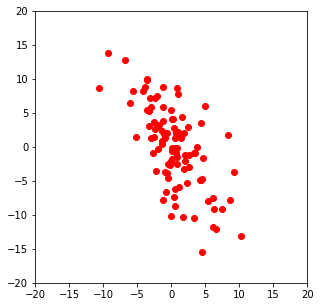

In [84]:
theta = np.radians(45)
rot_mat = np.asarray([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
X_rot = rot_mat.dot(X.T).T
# WRITE CODE HERE
# Code to rotate X
# populate new matrix X_rot
plot_data(X_rot)

**STEP 3 (done but need explanation): Perform pca with n_components=2**

Do you see anything interesting?

Explain the code below and write down your observations (2-3 lines only).


**Observations**

WRITE YOUR ANSWER HERE
- There seems to be no difference in the result of pca fit transform between X and X_rot
- The first principal component will be in the direction with the greatest variance and second will be perpendicular to the first
- When we rotated the data, their principal component was rotated as well. so once we project the data, there is no difference

In [85]:
import pandas as pd

def visualize_components(X, X_rot):
    pca = PCA(n_components=2)

    pca.fit(X)
    df1 = pd.DataFrame(pca.fit_transform(X))
    df2 = pd.DataFrame(pca.fit_transform(X_rot))

    return pd.concat((df1, df2), axis=1)[:20]

visualize_components(X, X_rot)

,0,1,0,1
0,1.601993,-1.204413,1.601993,-1.204413
1,4.616144,-1.006134,4.616144,-1.006134
2,1.648114,1.176322,1.648114,1.176322
3,-0.281346,-0.286818,-0.281346,-0.286818
4,-10.837513,1.211565,-10.837513,1.211565
5,2.864199,-0.540637,2.864199,-0.540637
6,10.052419,-1.830717,10.052419,-1.830717
7,6.678104,4.021400,6.678104,4.021400
8,3.899622,-0.557682,3.899622,-0.557682
9,-10.630510,-2.054246,-10.630510,-2.054246


**STEP 4: Perform PCA again and find angle between principal components**

- Perform PCA on X and X_rot with n_components=1
- It will give one basis vector for each of data (X and X_rot)
- Find the angle between these two basis vectors
- Explain your observations?

**Observations**

WRITE YOUR OBSERVATIONS HERE
-Angle between X and X_rot is 45, the exact amount it was rotated by
-Because the principal component is in the direction with the greated variance, it was rotated by 45 deg when we rotated the data
-Hence when we run pca, the data's principal components has a difference of 45 deg between X and X_rot

In [86]:
from numpy.linalg import norm

def angle_between(a,b):
    # COMPLETE THIS FUNCTION
    # CALCULATE ANGLE IN RAD BETWEEN TWO VECTORS
    return np.arccos(np.dot(a,b)/(np.linalg.norm(a)*np.linalg.norm(b)))
    pass

pca = PCA(n_components=1)
pca.fit(X)
c1 = pca.components_

pca.fit(X_rot)
c2 = pca.components_

np.rad2deg(angle_between(c1[0], c2[0]))

45.0

**(NO MARKS) STEP 5: Repeat these experiments for translation as well**

There is not marks for this part. You can do this for your own learning.

Now translate every point in `X` by fixed `x` and `y` amount.

`X = X + [1, 2]`

like so and repeat all the above experiments in cell below and write down your observations:

In [782]:
# PERFORM EXPERIMENTS WITH TRANSLATION HERE
# NO MARKS FOR DOING THIS

## TASK 3: Recovery of corrupted images using PCA

Check the code below.

It corrupts the `leena.jpg` image that you worked on before.

Check very carefully what below code is doing on the image and answer:

**Is it same as rotation of data points (like done before), if yes explain (just one liner)?**

EXPLAIN HERE
NO, it is randomizing the pixel within each patch

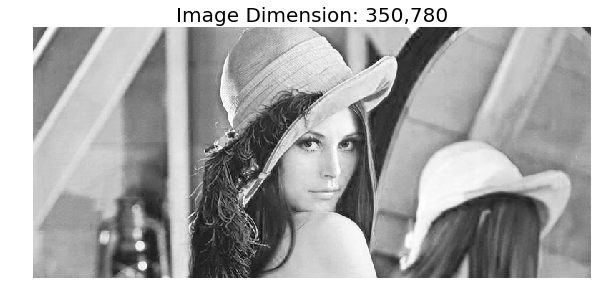

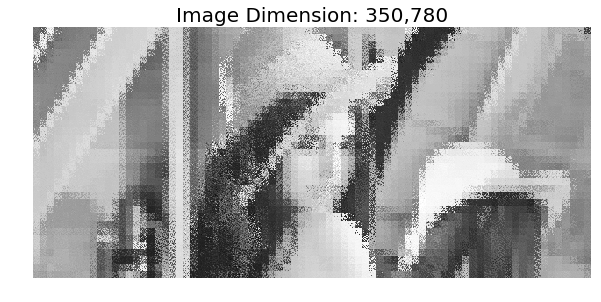

In [87]:
# Code for corrupting the leena image
image = convert_to_cf(imread('leena.jpg'))[0]

def corrupt_image(img):
    # lets patchify R channel with patches of 35x78 patches
    patches = patchify(img)
    
    # Noise 1:
    # lets jumble pixels of patches now
    jumble_idx = list(range(len(patches[0])))
    np.random.shuffle(jumble_idx)
    
    jumbled_patches = np.array([patch[jumble_idx] for patch in patches])
    rec_jumbled_image = depatchify(jumbled_patches, img_size=img.shape)
    
    return rec_jumbled_image


cimage = corrupt_image(image)

plt.figure(figsize=(10,10))
show_image(image)

plt.figure(figsize=(10,10))
show_image(cimage)

**Recovering from the corruption**

Use the `compress` function you coded earlier to get compressed form of original leena image and corrupted leena image.

We will try to recover the corrupted leena given the compressed version of original leena.

Notice in code below, I replace `aux_data` of corrupted version with `aux_data` of original version.

Does the code below code work in recovering the original leena image back?

**Explain how below code works and show it actually works?**

EXPLAIN HERE
- When we shuffled the pixels within each patch, we shuffled them all in the same order, this changes the principal components
- Then running PCA fit transform projected the shuffled pixels onto the shuffled principal components, which produce similar result to transform of non shuffled pixels on non shuffled components
- with n_components = 50, there isnt too much data lost
- transform back with non shuffled principal components reproduce original image

(50, 100)
(100,)
(350, 780)


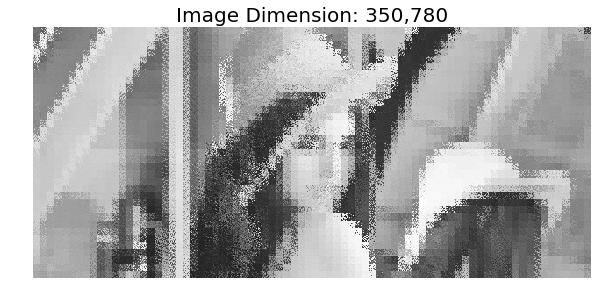

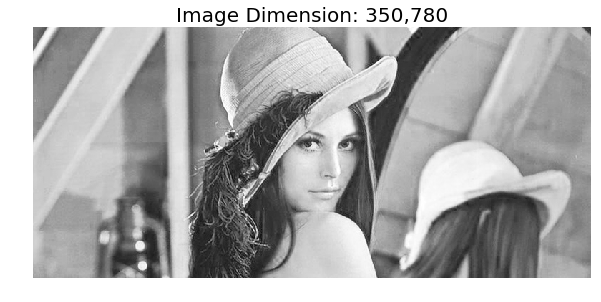

In [207]:
# This assuming your compress function returns dictionary which contains `aux_data`
# if you coded your compress in diferent way then change code below appropriately
# basically u need to replace auxiliary data of corrupted with original while keeping compressed (transformed) data same
d = compress(image, n_components=50)
d1 = compress(cimage, n_components=50)

plt.figure(figsize=(10, 10))
show_image(decompress(d1))

d1['aux_data'] = d['aux_data']
plt.figure(figsize=(10, 10))
show_image(decompress(d1))


components, means, img_size = d['aux_data']
print(components.shape)
print(means.shape)
print(img_size)

## Task 4: Decrypting manuscript of the lost civilization

You belong to one of the advanced civilization,  while exploring the universe you land on the planet Earth, however, there is no inhabitants on that planet anymore. While exploring the remains of "humans" on planet Earth, you come across some damaged hard drive that contains various images. You suspect that these images manuscript of how "humans" use to write different digits in maths. You recovered all the data from that hard drive safely. You opened up your jupyter notebook (python being universal language and popular among alien species), you started plotting the images you just recovered. 

In [96]:
rimages = np.load('recovered_images.npy')
rimages.shape

(20, 28, 28)

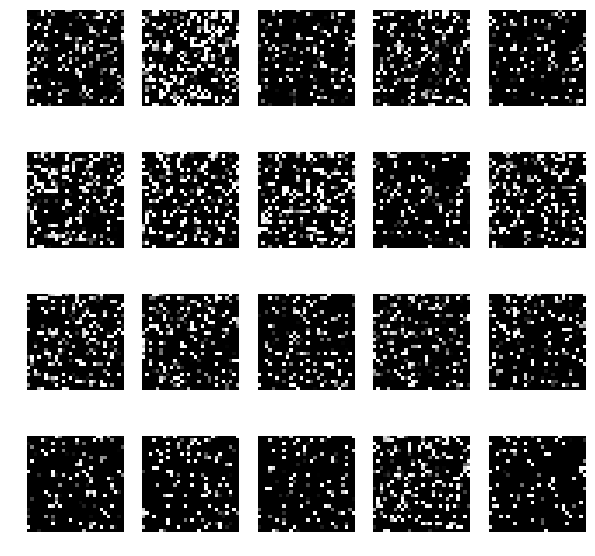

In [91]:
def plot_manuscript(images):
    for i, img in enumerate(images):
        plt.subplot(4, 5, i+1)
        plt.imshow(img, cmap='Greys_r')
        plt.axis('off')
        
plt.figure(figsize=(10, 10))
plot_manuscript(rimages)

You being very smart, you figured out these images are encrypted and not in their original form. You also figured out that encryption is just fixed jumbling of the pixel of the images. Since you're unaware of manuscript, you cannot decrypt the images just by themselves even if they follow the fixed jumbling pattern. However, fortunately you have `principal components` and `mean` of the the original manuscript. Now, your task is to recover 20 images and plot them nicely in cell below.

Use `plot_manuscript` function from above to plot the recovered manuscript.

original_components
(20, 784)
original_mean
(784,)
fimg
(20, 784)
data 
(20, 20)
pca.components_.shape 
(20, 784)
np.dot(data, original_components).shape
(20, 784)


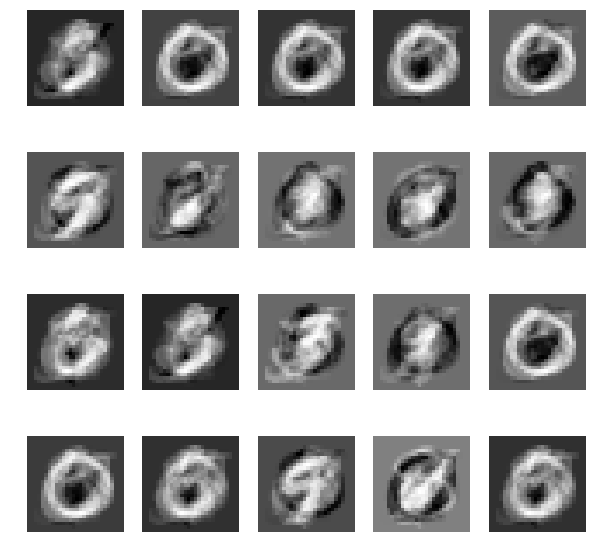

In [216]:
original_components = np.load('original_pca.npy')
print('original_components')
print(original_components.shape)
original_mean = np.load('original_mean.npy')
print('original_mean')
print(original_mean.shape)

# you have three data original_components, original_mean and rimages
# `rimages` contains corrupted version of images from original manuscript
# `original_components` contains principal components of images from the original manuscript
# `original_mean` contains mean values of each dimension of the images from original manuscript
# use all these things to recover/estimate images of the original manuscript containing 20 images
# plot all those recovred 20 images from `plot_manuscript` function 

fimg = rimages.reshape(20, 784)
print('fimg')
print(fimg.shape)

pca = PCA(n_components=20)
data = pca.fit_transform(fimg)
print('data ')
print(data .shape)
print('pca.components_.shape ')
print(pca.components_.shape)

dimg = np.dot(data, original_components) + original_mean
print('np.dot(data, original_components).shape')
print(np.dot(data, original_components).shape)

final = dimg.reshape(20, 28, 28)

finala = np.array([])
for i in range(10):
    np.append(finala, dimg[i].reshape((28,28)))

plt.figure(figsize=(10, 10))
plot_manuscript(final)